Questo esercizio è una simulazione della dinamica molecolare di N particelle.  
Il contesto è quello dell'insieme microcanonico in cui il sistema è isolato, ossia si ha una conservazione dell'energia.  La necessità di mantenere costante l'energia richiede di integrare le equazioni del moto usando un algoritmo che sia invariante per inversione temporale, nel nostro caso abbiamo usato l'algoritmo di Verlet. 
Questo algoritmo calcola la posizione di ogni particella all'istante $t+\delta t$ a partire dalla posizione all'istante $t-\delta t$, dalla posizione al tempo $t$ e dalla forza che agisce sulla particella al tempo t secondo l'algoritmo:  
$\vec{r}(t+\delta t)=2 \vec{r}(t) - \vec{r}(t-\delta t) + \frac{{\delta t}^2}{m} \vec{F}(t)$  
dove m rappresenta la massa della particella e $\vec{F}(t)$ la forza che agisce sulla particella.  
Il modello fissa una formula per $V(\{\vec{r}_i \}_i)$, tramite cui è possibile calcolare $\vec{F}(t)$ a partire dalle posizioni delle particelle al tempo t.  
Nel nostro caso abbiamo usato il potenziale di Lennard-Jones che descrive l'interazione tra due molecole a distanza r con la formula:  
$V_{LJ}(r)=4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^6]$

Per simulare un sistema con infinite particelle sono state introdotte le condizioni al contorno periodiche con periodicità pari a un cubo di lato L.  In questo modo ci basta integrare l'equazione del moto delle particelle all'interno di una scatola per capire come varia il sistema composto da infinite particelle.  
Siccome non si può calcolare il contributo del potenziale dovuto alle infinite molecole del nostro sistema e siccome abbiamo un potenziale a breve range consideriamo il potenziale:  
$$
V(r) = 
\begin{cases} 
V_{LJ}(r)=4\epsilon[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^6] & \text{se } r < r_c \\
0 & \text{se } r \geq r_c \\
\end{cases}
$$


Nella simulazione si sono adottate le unità ridotte, denotate nelle seguenti formule dall'apice: *  
$r^*=\frac{r}{\sigma}$ (r distanza qualunue)  
$E^*=\frac{E}{\epsilon}$ (E energia qualunque)  
$M^*=\frac{M}{m}$ (con M massa qualunque e m massa delle molecole del sistema)  
$t^*=t\frac{1}{\sigma} \sqrt{\frac{\epsilon}{m}}$ (t tempo qualunque)  
$T^*=\frac{k_B T}{\epsilon}$ (T temperatura qualunque)  
$P^*=\frac{P \sigma ^3}{\epsilon}$ (P pressione qualunque)  
$\rho^*=\rho \sigma^3$ ($\rho$ densità numerica qualunque)  
  

# 4.1

Ho stimato la pressione del sistema tramite la formula: 
$$ P^* = \rho^* T^* + \frac{1}{3V_c^*} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^{r_j<r_c} 48 \left[ \left(\frac{1}{|\vec{r}^*_i -\vec{r}^*_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r}^*_i -\vec{r}^*_j|}\right)^6 \right] \right\rangle $$
dove N è il numero di particelle nella cella elementare e $V_c$ è il volume della cella elementare.

# 4.2

Usando N=108 e $\delta t^*=0.0005$ ho misurato diverse proprietà del sistema.  Per fare ciò ho sfruttato l'ipotesi di ergodicità per misurare queste proprietà.
Le ho infatti misurate facendo una media di esse nel tempo dopo che il sistema ha raggiunto l'equilibrio.  Ho usato la media a blocchi.  
Per assicurarmi che il sistema raggiunga l'equilibrio ho prima graficato le proprietà da misurare prendendo blocchi di dimensione 1 (proprietà istantanee) e ho visto a partire da quale step queste si stabilizzavano intorno a un valore. Questo è il valore degli step necessari a termalizzare il sistema.  Guardando questo grafico posso anche capire la temperatura che devo dare come input affinchè il sistema risulti in equilibrio alla temperatura desiderata.  
Ho poi ripetuto la simulazione calcolando le osservabili di mio interesse solo una volta raggiunto lo step di termalizzazione.  
Questo procedimento è stato ripetuto anche nelle esercitazioni successive nel caso in cui abbia avuto necessità di "termalizzare" (o comunque equilibrare) il sistema.  


## 4.2.1

fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)

Il valore '#     BLOCK:          ACTUAL_T:              T_AVE:              ERROR:' non può essere convertito in float.


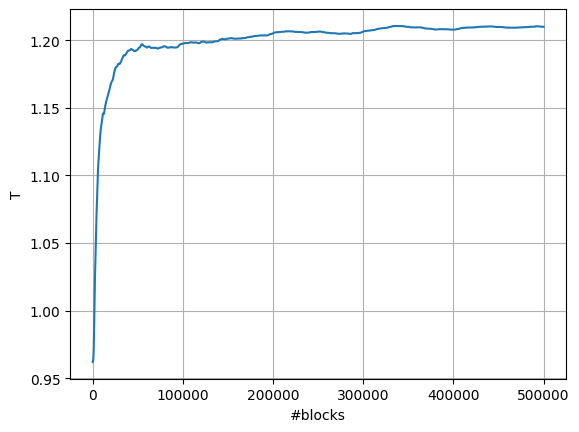

Il valore '#     BLOCK:          ACTUAL_TE:              TE_AVE:              ERROR:' non può essere convertito in float.


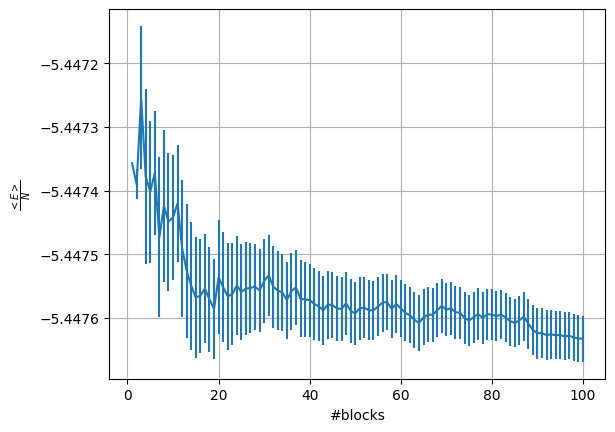

Il valore '#     BLOCK:          ACTUAL_PE:              PE_AVE:              ERROR:' non può essere convertito in float.


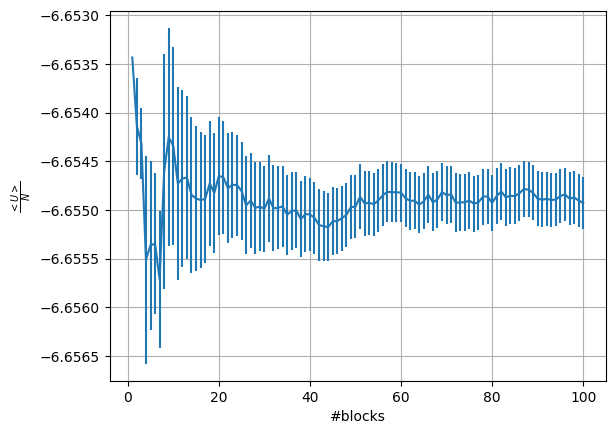

Il valore '#     BLOCK:          ACTUAL_KE:              KE_AVE:              ERROR:' non può essere convertito in float.


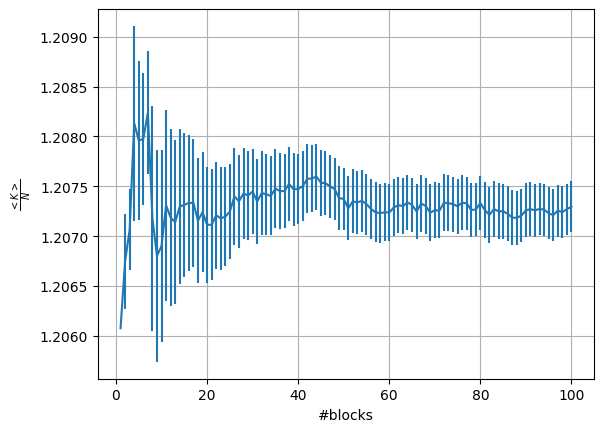

Il valore '#     BLOCK:          ACTUAL_T:              T_AVE:              ERROR:' non può essere convertito in float.


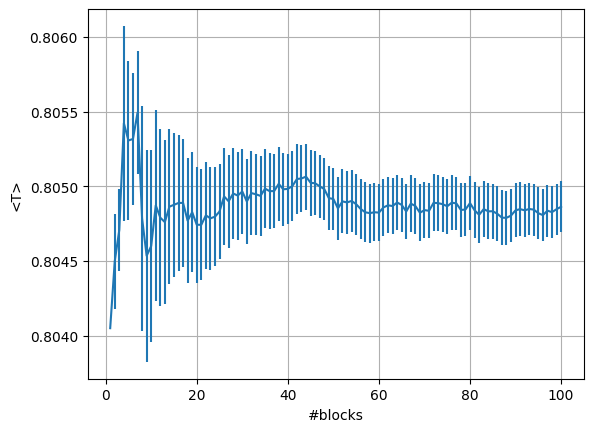

Il valore '#     BLOCK:          ACTUAL_P:              P_AVE:              ERROR:' non può essere convertito in float.


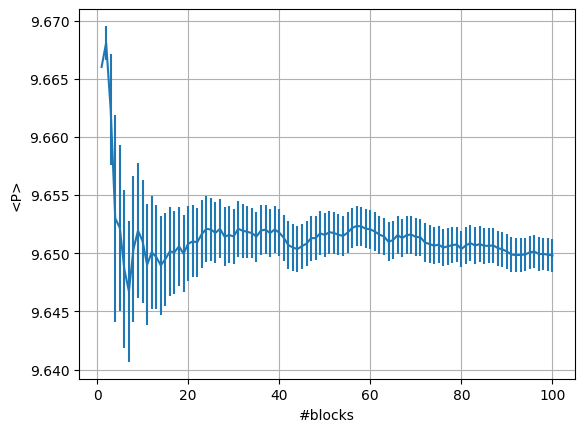

In [37]:
#solido

import matplotlib.pyplot as plt
import numpy as np


# NBLOCKS                100
# NSTEPS                 4000 (steps per blocco)


plt.rcParams["axes.formatter.useoffset"]= False

# #valori Argon
# sigma=0.34 # in nm
# eps_su_boltz=120 # in kelvin
# m=39.918 # in amu (atimic mass unit)


# Temperatura data in input=1.55


# xx = np.arange(N)      # [0,1,2,...,N-1]
# print (type(f))

with open("./NSL_SIMULATOR/OUTPUT/temperature.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.plot(x,y_av)
plt.xlabel('#blocks')
plt.ylabel('T')
plt.grid(True)
plt.show()







with open("solido_<E>.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")

# print(bl)
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel(r'$\frac{<E>}{N}$')
plt.grid(True)
plt.show()

with open("solido_<U>.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")

# print(bl)
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel(r'$\frac{<U>}{N}$')
plt.grid(True)
plt.show()



with open("solido_<K>.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel(r'$\frac{<K>}{N}$')
plt.grid(True)
plt.show()
    
with open("solido_T.dat", 'r') as f: # con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel('<T>')
plt.grid(True)
plt.show()

with open("solido_P.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
# print(y)

plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel('<P>')
plt.grid(True)
plt.show()

# plt.plot(np.array(bl),np.array(err)-(np.array(bl))**0.5)
# # plt.plot(bl,err-sqrt(bl))
# plt.xlabel('#step')
# plt.ylabel(r'$\sigma_{\sqrt{<|r|^2>_{RW}}}-\sqrt{\# steps}$')
# plt.grid(True)
# plt.show()

## 4.2.2

fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)

Il valore '#     BLOCK:          ACTUAL_TE:              TE_AVE:              ERROR:' non può essere convertito in float.


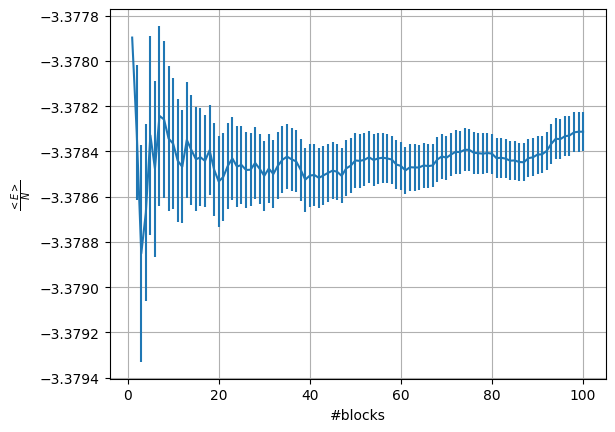

Il valore '#     BLOCK:          ACTUAL_PE:              PE_AVE:              ERROR:' non può essere convertito in float.


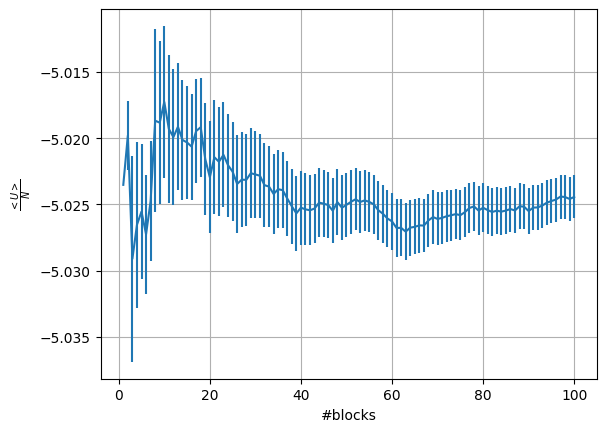

Il valore '#     BLOCK:          ACTUAL_KE:              KE_AVE:              ERROR:' non può essere convertito in float.


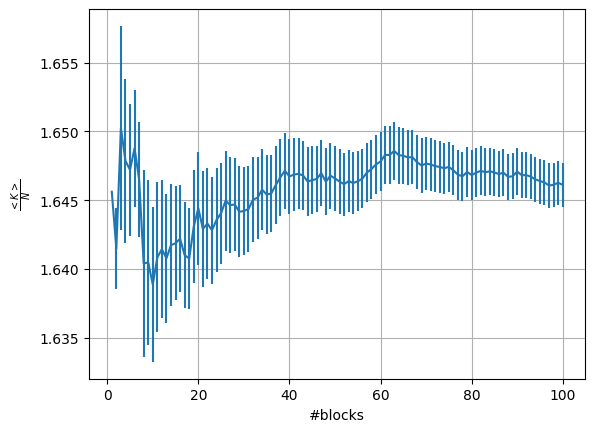

Il valore '#     BLOCK:          ACTUAL_T:              T_AVE:              ERROR:' non può essere convertito in float.


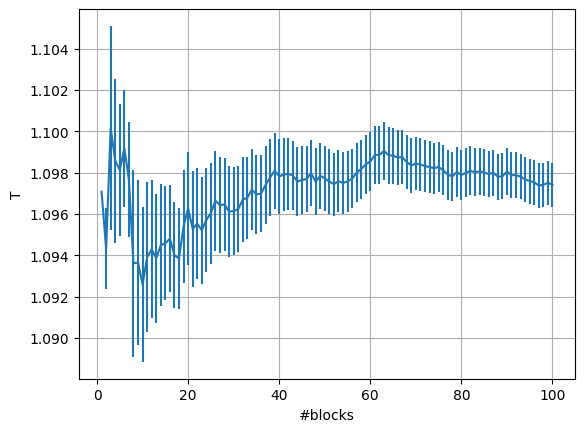

Il valore '#     BLOCK:          ACTUAL_P:              P_AVE:              ERROR:' non può essere convertito in float.


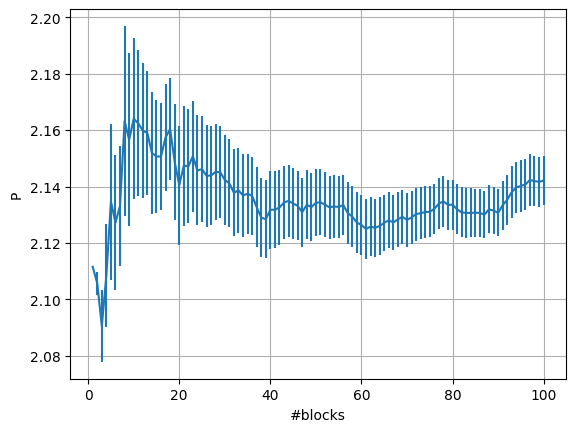

In [38]:
#liquido

import matplotlib.pyplot as plt
import numpy as np



#Temperatura data in input=1.96

# with open("./NSL_SIMULATOR/OUTPUT/temperature.dat", 'r') as f:# con with il file si chiude da solo appena finito 
#     righe=f.read().split("\n")
#     # print(righe)
#     err=[]
#     x=[]
#     y=[]
#     y_av=[]
#     for i in righe:
#             if(i!=""):
#                 try:
#                     # print(i.split("\t"))
#                     a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
#                     # print(i)
#                     x.append(int(a))
#                     y.append(float(b))
#                     y_av.append(float(c))
#                     err.append(float(d))
#                 except ValueError:
#                     print(f"Il valore '{i}' non può essere convertito in float.")
# plt.plot(x,y_av)
# plt.xlabel('#blocks')
# plt.ylabel('T')
# plt.grid(True)
# plt.show()







with open("liquido_<E>.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")

# print(bl)
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel(r'$\frac{<E>}{N}$')
plt.grid(True)
plt.show()

with open("liquido_<U>.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")

# print(bl)
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel(r'$\frac{<U>}{N}$')
plt.grid(True)
plt.show()

with open("liquido_<K>.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel(r'$\frac{<K>}{N}$')
plt.grid(True)
plt.show()
    
with open("liquido_T.dat", 'r') as f: # con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel('T')
plt.grid(True)
plt.show()

with open("liquido_P.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel('P')
plt.grid(True)
plt.show()

# plt.plot(np.array(bl),np.array(err)-(np.array(bl))**0.5)
# # plt.plot(bl,err-sqrt(bl))
# plt.xlabel('#step')
# plt.ylabel(r'$\sigma_{\sqrt{<|r|^2>_{RW}}}-\sqrt{\# steps}$')
# plt.grid(True)
# plt.show()

## 4.2.3

fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)

Il valore '#     BLOCK:          ACTUAL_T:              T_AVE:              ERROR:' non può essere convertito in float.


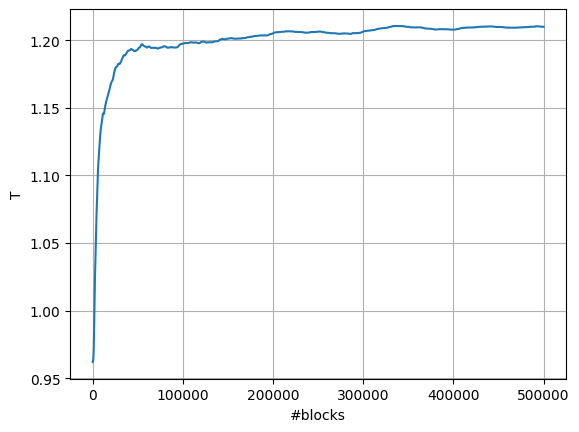

Il valore '#     BLOCK:          ACTUAL_TE:              TE_AVE:              ERROR:' non può essere convertito in float.


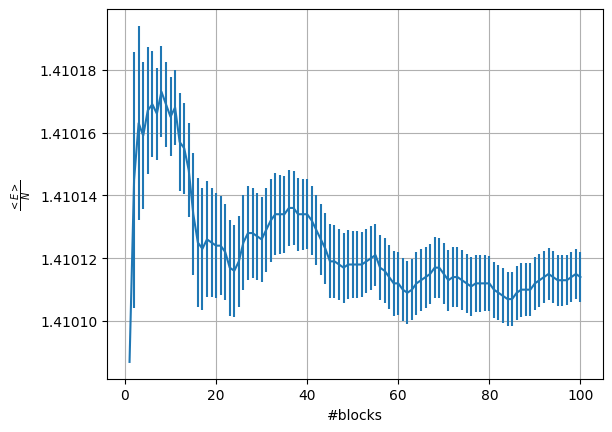

Il valore '#     BLOCK:          ACTUAL_PE:              PE_AVE:              ERROR:' non può essere convertito in float.


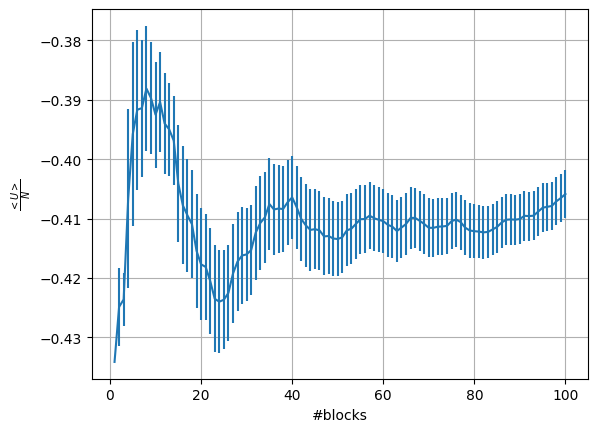

Il valore '#     BLOCK:          ACTUAL_KE:              KE_AVE:              ERROR:' non può essere convertito in float.


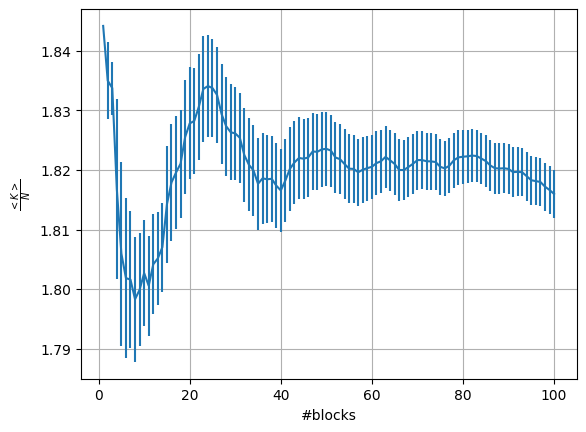

Il valore '#     BLOCK:          ACTUAL_T:              T_AVE:              ERROR:' non può essere convertito in float.


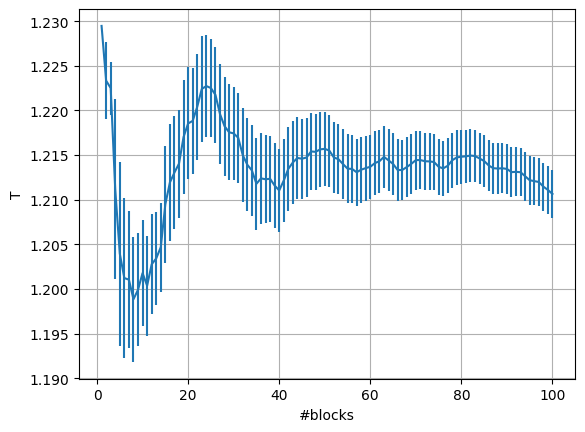

Il valore '#     BLOCK:          ACTUAL_P:              P_AVE:              ERROR:' non può essere convertito in float.


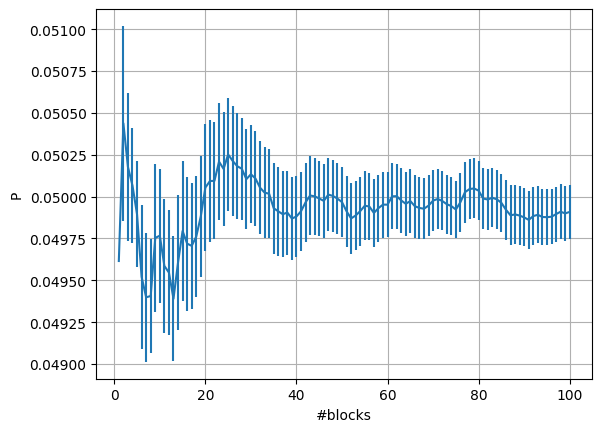

In [39]:
#gas

import matplotlib.pyplot as plt
import numpy as np



# Temperatura data in input=0.962


with open("./NSL_SIMULATOR/OUTPUT/temperature.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.plot(x,y_av)
plt.xlabel('#blocks')
plt.ylabel('T')
plt.grid(True)
plt.show()


# NBLOCKS                100
# NSTEPS                 4000

with open("gas_<E>.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")

# print(bl)
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel(r'$\frac{<E>}{N}$')
plt.grid(True)
plt.show()

with open("gas_<U>.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")

# print(bl)
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel(r'$\frac{<U>}{N}$')
plt.grid(True)
plt.show()

with open("gas_<K>.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel(r'$\frac{<K>}{N}$')
plt.grid(True)
plt.show()
    
with open("gas_T.dat", 'r') as f: # con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel('T')
plt.grid(True)
plt.show()

with open("gas_P.dat", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    x=[]
    y=[]
    y_av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b,c,d=i.split() #split() separa se ho cose tra 1 o più spazi vuoti
                    # print(i)
                    x.append(int(a))
                    y.append(float(b))
                    y_av.append(float(c))
                    err.append(float(d))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
plt.errorbar(x,y_av,err)
plt.xlabel('#blocks')
plt.ylabel('P')
plt.grid(True)
plt.show()

# plt.plot(np.array(bl),np.array(err)-(np.array(bl))**0.5)
# # plt.plot(bl,err-sqrt(bl))
# plt.xlabel('#step')
# plt.ylabel(r'$\sigma_{\sqrt{<|r|^2>_{RW}}}-\sqrt{\# steps}$')
# plt.grid(True)
# plt.show()



